In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from joblib import load
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv("/home/ivana/Desktop/IP-projekat/2023_Data_Mining_Smoking_Dataset/datasets/data1.csv")
data

,Unnamed: 0,gender,age,height(cm),weight(kg),eyesight(left),hearing(left),hearing(right),relaxation,fasting blood sugar,...,triglyceride,HDL,hemoglobin,Urine protein,serum creatinine,AST,Gtp,dental caries,tartar,smoking
0,0,0,40,155,60,1.2,1.0,1.0,73.0,94.0,...,82.0,73.0,12.9,1.0,0.7,18.0,27.0,0,1,0
1,1,0,40,160,60,0.8,1.0,1.0,70.0,130.0,...,115.0,42.0,12.7,1.0,0.6,22.0,18.0,0,1,0
2,2,1,55,170,60,0.8,1.0,1.0,86.0,89.0,...,182.0,55.0,15.8,1.0,1.0,21.0,22.0,0,0,1
3,3,1,40,165,70,1.5,1.0,1.0,60.0,96.0,...,254.0,45.0,14.7,1.0,1.0,19.0,18.0,0,1,0
4,4,0,40,155,60,1.0,1.0,1.0,74.0,80.0,...,74.0,62.0,12.5,1.0,0.6,16.0,22.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,55687,0,40,170,65,0.9,1.0,1.0,68.0,89.0,...,99.0,75.0,12.3,1.0,0.6,14.0,10.0,1,1,0
55688,55688,0,45,160,50,1.2,1.0,1.0,62.0,89.0,...,69.0,73.0,14.0,1.0,0.9,20.0,14.0,0,1,0
55689,55689,0,55,160,50,1.0,1.0,1.0,72.0,88.0,...,77.0,79.0,12.4,1.0,0.5,17.0,12.0,0,0,0
55690,55690,1,60,165,60,0.8,1.0,1.0,76.0,107.0,...,79.0,48.0,14.4,1.0,0.7,20.0,18.0,0,0,0


In [3]:
data.drop('Unnamed: 0', axis=1,inplace=True)

In [4]:
Y = data['smoking']
X = data.drop('smoking', axis=1)
feature_names = X.columns
X.head()

,gender,age,height(cm),weight(kg),eyesight(left),hearing(left),hearing(right),relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,hemoglobin,Urine protein,serum creatinine,AST,Gtp,dental caries,tartar
0,0,40,155,60,1.2,1.0,1.0,73.0,94.0,215.0,82.0,73.0,12.9,1.0,0.7,18.0,27.0,0,1
1,0,40,160,60,0.8,1.0,1.0,70.0,130.0,192.0,115.0,42.0,12.7,1.0,0.6,22.0,18.0,0,1
2,1,55,170,60,0.8,1.0,1.0,86.0,89.0,242.0,182.0,55.0,15.8,1.0,1.0,21.0,22.0,0,0
3,1,40,165,70,1.5,1.0,1.0,60.0,96.0,322.0,254.0,45.0,14.7,1.0,1.0,19.0,18.0,0,1
4,0,40,155,60,1.0,1.0,1.0,74.0,80.0,184.0,74.0,62.0,12.5,1.0,0.6,16.0,22.0,0,0


Normalizujemo podatke:

In [5]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=feature_names)

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X)

In [7]:
X_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])

In [8]:
X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,0.247869,0.734230,-0.265813,-0.121456,0.091096,0.003330
1,0.233777,0.720670,-0.268017,-0.129804,0.107056,0.011747
2,0.174109,-0.669306,-0.062003,0.087375,-0.191535,0.046883
3,-0.465641,0.033285,-0.389891,-0.022104,-0.030313,0.023937
4,0.878671,0.033941,0.068512,-0.145763,0.101640,-0.023365


Klasterovacemo podatke u razlicitom broju klastera i za svako racunati sileta Silhouette 
koeficijent kako bismo procenilo kvalitet klasterovanja:

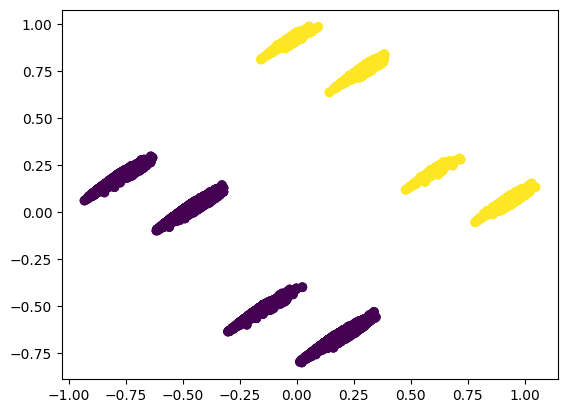

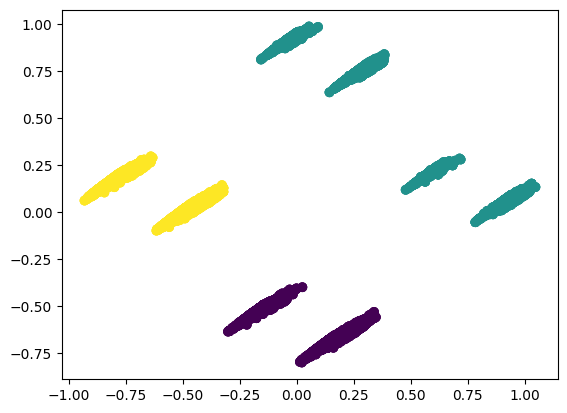

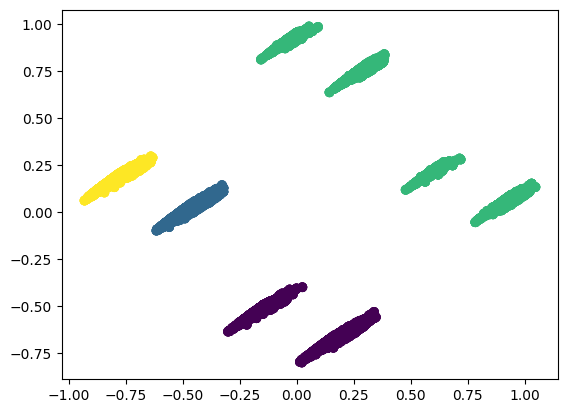

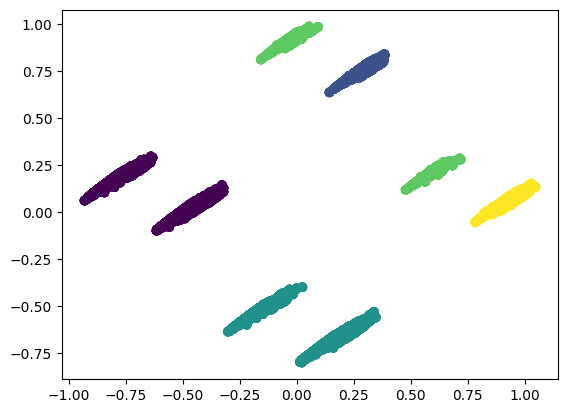

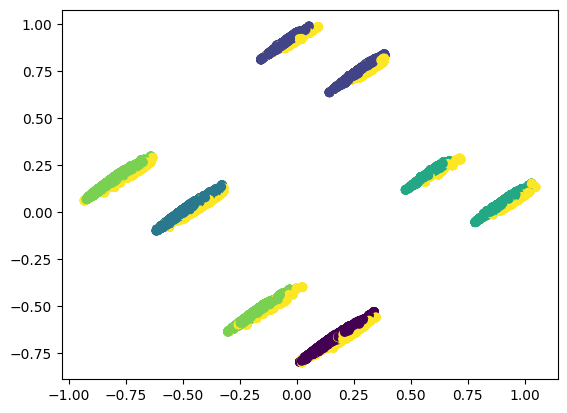

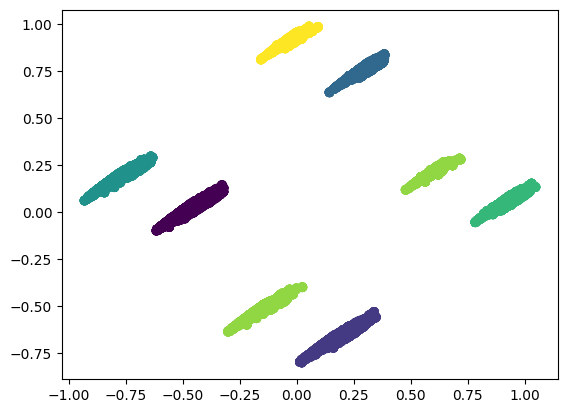

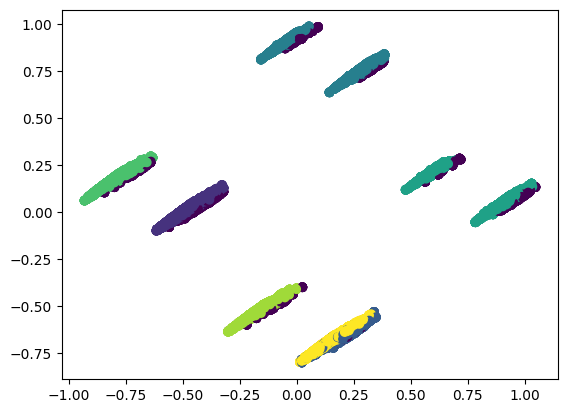

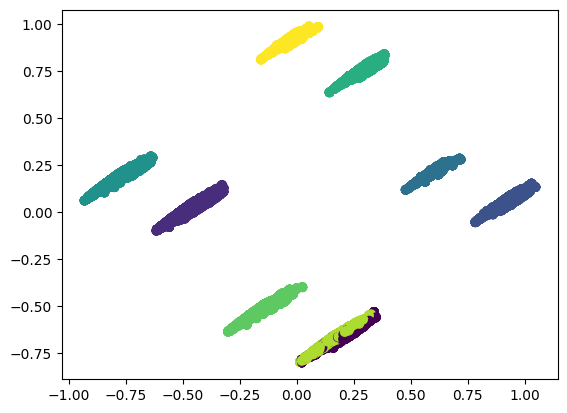

In [13]:
silhouettes = []

for i in range(2, 10):
    gmm = GaussianMixture(n_components = i)
    gmm.fit(X)
    labels = gmm.predict(X)
    for j in range (i):
        plt.scatter(X_pca["PC1"], X_pca["PC2"], c=labels)
    silhouettes.append(silhouette_score(X, labels))
    plt.show()
    

In [14]:
silhouettes

[0.34719714122922435,
 0.3924701018229399,
 0.41929521865401437,
 0.4761557698098328,
 0.5078939021661628,
 0.5791481230825435,
 0.5291836788306855,
 0.5779347475543463]

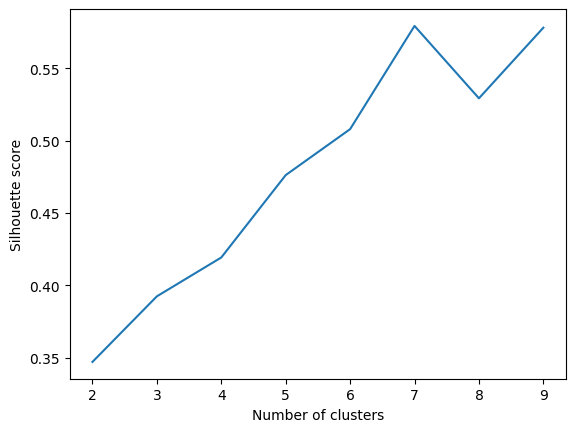

In [15]:
plt.plot(range(2, 10), silhouettes)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

Vidimo da je Silhouetta koeficijent najveci za 7 klastera.

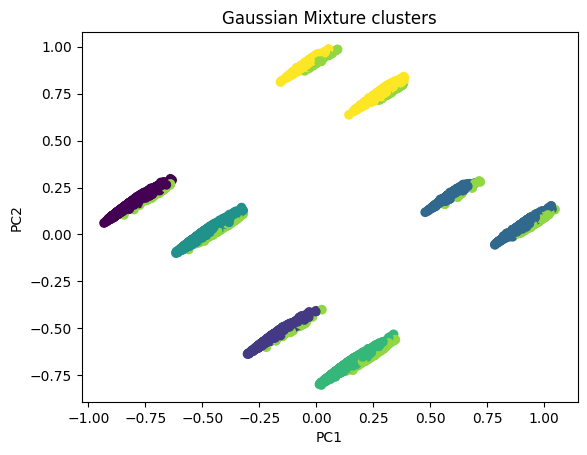

In [9]:
model = GaussianMixture(n_components = 7)
model.fit(X)
labels = model.predict(X)

X_pca['labels']= labels
scatter = plt.scatter(X_pca["PC1"], X_pca["PC2"],c=labels)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('{} clusters'.format("Gaussian Mixture"))
plt.show()



In [10]:
from sklearn.metrics import silhouette_score, homogeneity_score
# Homogenost klastera
homogeneity_score(labels_true=Y, labels_pred=labels)

0.243487271515453

In [11]:
# Silueta
silhouette_score(X, labels, metric='euclidean')

0.5541914802587632

In [14]:
import os
import pickle

output_directory = '/home/ivana/Desktop/IP-projekat/2023_Data_Mining_Smoking_Dataset/models/clustering/modeli/'

name = 'Gaus.pkl'
try:
  with open(os.path.join(output_directory, name), 'wb') as file:
    pickle.dump(model, file)
except IOError as err:
  print('Error while exporting model \'{}\''.format(name.split('.')[0]))
  print(err)